# SymPy for solving Euler-Bernoulli

```{custom_download_link} ./sympy_mech_stripped.ipynb
:replace_default: "True"
```

SymPy can be used to solve the Euler-Bernoulli's beam theory. It will take over the cumbersome handcalculations. However the engineering part; the thinking, the modelling and the correct input of the specifications still remains a human matter. 

A simple beam is taken as an example. The beam is loaded with a uniform load $q$ on a part of the beam and a force $F$. The beam is a prismatic beam with a bending stiffness $EI$.

```{figure} ./sympy_mech_data/beam.svg
:align: center
```

We can solve this beam by using the [Euler-Bernoulli's differential equation](beam_force_ode). This page will focus solely on the implementations of those calculations in SymPy. Click {fa}`rocket` --> {guilabel}`Live Code` to activate live coding on this page!

First, the SymPy library is imported:

In [30]:
import sympy as sym
sym.init_printing()

In [1]:
import sympy as sym

Now, we'll define our symbols. These includes all symbols (non-numerical values), so also including intergration constants. We do so with the `sym.symbols` function:

In [2]:
x, q, F, EI = sym.symbols('x, q, F, EI')
C1, C2, C3, C4, C5, C6, C7, C8, C9, C10, C11, C12 = sym.symbols('C1 C2 C3 C4 C5 C6 C7 C8 C9 C10 C11 C12')

The functions $q\left(x\right)$ for each of the segments can now be defined:

In [3]:
q_AC = q
q_CD = 0
q_DB = 0

We can integrate using the `sym.integrate()` function:

In [4]:
V_AC = sym.integrate(-q_AC,x)+C1
M_AC = sym.integrate(V_AC,x)+C2
kappa_AC = M_AC / EI
phi_AC = sym.integrate(kappa_AC,x)+C3
w_AC = sym.integrate(-phi_AC,x)+C4

V_CD = sym.integrate(-q_CD,x)+C5
M_CD = sym.integrate(V_CD,x)+C6
kappa_CD = M_CD / EI
phi_CD = sym.integrate(kappa_CD,x)+C7
w_CD = sym.integrate(-phi_CD,x)+C8

V_DB = sym.integrate(-q_DB,x)+C9
M_DB = sym.integrate(V_DB,x)+C10
kappa_DB = M_DB / EI
phi_DB = sym.integrate(kappa_DB,x)+C11
w_DB = sym.integrate(-phi_DB,x)+C12

You can display the equations with the `display` function:

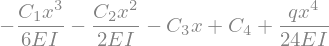

In [5]:
display(w_AC)

The boundary conditions can now be specified using the `sym.Eq()` function which takes as an input the left- and righthandside of an equation. Furthermore the `.subs()` function fill in a value in your expression:

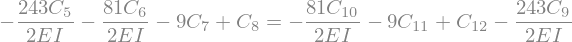

In [11]:
Eq1 = sym.Eq(w_AC.subs(x, 0), 0) 
Eq2 = sym.Eq(M_AC.subs(x, 0), 0)
Eq3 = sym.Eq(w_AC.subs(x, 4), w_CD.subs(x, 4))
Eq4 = sym.Eq(phi_AC.subs(x, 4), phi_CD.subs(x, 4))
Eq5 = sym.Eq(M_AC.subs(x, 4), M_CD.subs(x, 4))
Eq6 = sym.Eq(V_AC.subs(x, 4), V_CD.subs(x, 4))
Eq7 = sym.Eq(w_CD.subs(x, 9), w_DB.subs(x, 9))
Eq8 = sym.Eq(phi_CD.subs(x, 9), phi_DB.subs(x, 9))
Eq9 = sym.Eq(V_CD.subs(x, 9), V_DB.subs(x, 9)+F)
Eq10 = sym.Eq(M_CD.subs(x, 9), M_DB.subs(x, 9))
Eq11 = sym.Eq(w_DB.subs(x, 15), 0)
Eq12 = sym.Eq(M_DB.subs(x, 15), 0)

display(Eq7)

Now we use the function `sym.solve` to solve our system of equations for our integration constants:

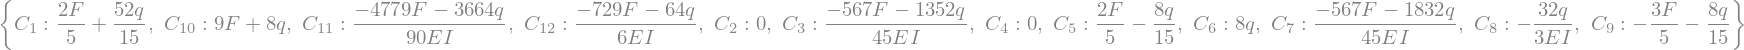

In [12]:
sol = sym.solve((Eq1,Eq2,Eq3,Eq4,Eq5,Eq6,Eq7,Eq8,Eq9,Eq10,Eq11,Eq12), (C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12))
display(sol)

We can use `.subs()` again to substitute this solution in our original function:

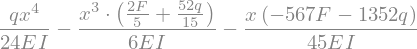

In [13]:
display(w_AC.subs(sol))

Instead of symbolic values, you could have worked with numerical values too from the beginning. Nevertheless, we can substitute some random values with out final expression too, including a value for x. Use `.evalf()` to show the decimal form of your answer:

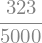

In [19]:
display(w_CD.subs(sol).subs(EI,50000).subs(q,10).subs(F,35).subs(x,6))
display(w_CD.subs(sol).subs(EI,50000).subs(q,10).subs(F,35).subs(x,6).evalf())

You can plot the results too. The details of how to make plot is not covered here (if you're curious, the book [Python for Engineers](https://teachbooks.github.io/learn-python) might help you). On this page, you can use the function `plot()`, with a list of functions to plot and a list of domains over which to plot those functions:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']

def plot(w_list, x_range_list,ylabel):
    plt.figure()
    for i, w in enumerate(w_list):
        # check if x is the only symbol in the expression
        if len(w.free_symbols) > 1:
            raise ValueError('The expression must be a function of x only.')
        
        w_numpy = sym.lambdify(x, w)
        x_vals = np.linspace(x_range_list[i][0], x_range_list[i][1], 100)
        
        # if the expression is a constant, we need to make sure that it is broadcasted correctly
        if isinstance(w_numpy(x_vals),float) or isinstance(w_numpy(x_vals),int):
            w_numpy = np.vectorize(w_numpy)
            plt.plot([x_range_list[i][0], x_range_list[i][1]],[w_numpy(x_vals),w_numpy(x_vals)])
        else:
            plt.plot(x_vals,w_numpy(x_vals))

        plt.plot(x_vals,w_numpy(x_vals))
        plt.xlabel('$x$')
        plt.ylabel(ylabel)
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.invert_yaxis()

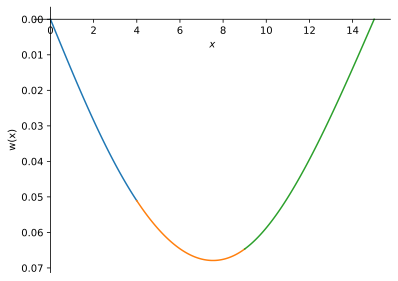

In [28]:
plot([w_AC.subs(sol).subs(EI,50000).subs(q,10).subs(F,35), w_CD.subs(sol).subs(EI,50000).subs(q,10).subs(F,35), w_DB.subs(sol).subs(EI,50000).subs(q,10).subs(F,35)], [[0, 4],[4, 9],[9, 15]],'w(x)')

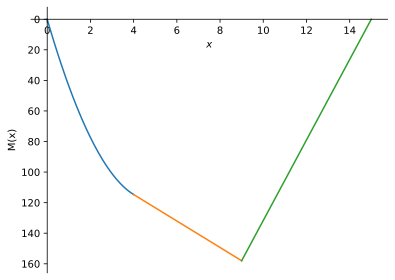

In [27]:
plot([M_AC.subs(sol).subs(q,10).subs(F,35), M_CD.subs(sol).subs(q,10).subs(F,35), M_DB.subs(sol).subs(q,10).subs(F,35)], [[0, 4],[4, 9],[9, 15]],'M(x)')

## Exercises
- Exercises are available in chapter 8.6 of the book Engineering Mechanics Volume 2 {cite:p}`Hartsuijker2006`: 8.7 - 8.11, 8,26 - 8.31, 8.34 - 8.37. Try to solve these exercises using Python and Sympy, or another numerical tool you master.

If you don't have Python and SymPy installed, click {fa}`rocket` --> {guilabel}`Live Code` to activate live coding and use the cells below:

In [21]:
import sympy as sym
sym.init_printing()

In [ ]:
x = sym.symbols('x')
C1, C2, C3, C4 = sym.symbols('C1 C2 C3 C4')

In [ ]:
q = 

In [ ]:
V = sym.integrate(-q,x)+C1
M = sym.integrate(V,x)+C2
kappa = M / EI
phi = sym.integrate(kappa,x)+C3
w = sym.integrate(-phi,x)+C4

In [ ]:
Eq1 = sym.Eq(

In [ ]:
sol = sym.solve((Eq1,Eq2,Eq3,Eq4,Eq5,Eq6,Eq7,Eq8,Eq9,Eq10,Eq11,Eq12), (C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12))
display(sol)

In [ ]:
M.subs(sol)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']

def plot(w_list, x_range_list,ylabel):
    plt.figure()
    for i, w in enumerate(w_list):
        # check if x is the only symbol in the expression
        if len(w.free_symbols) > 1:
            raise ValueError('The expression must be a function of x only.')
        
        w_numpy = sym.lambdify(x, w)
        x_vals = np.linspace(x_range_list[i][0], x_range_list[i][1], 100)
        
        # if the expression is a constant, we need to make sure that it is broadcasted correctly
        if isinstance(w_numpy(x_vals),float) or isinstance(w_numpy(x_vals),int):
            w_numpy = np.vectorize(w_numpy)
            plt.plot([x_range_list[i][0], x_range_list[i][1]],[w_numpy(x_vals),w_numpy(x_vals)])
        else:
            plt.plot(x_vals,w_numpy(x_vals))

        plt.plot(x_vals,w_numpy(x_vals))
        plt.xlabel('$x$')
        plt.ylabel(ylabel)
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.invert_yaxis()

In [ ]:
plot(